# Forward and Backward Euler Methods

**Reference:** Chapter 17 in *Computational Nuclear Engineering and Radiological Science Using Python*, R. McClarren (2018).

## Learning Objectives

After studying this notebook, completing the activties, and attending class, you should be able to:
* Explain the difference between forward and backward Euler methods to approximate solutions to IVP.
  * Ease to implement, computational expense (how does this relate to explicit versus implicit?)
* Understand how step size impacts the accuracy of the approximation.
* Compute initial value problems (IVP).

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Main Idea

In the next few notebooks, we will discuss techniques to compute approximate solutions to **initial value problems (IVP)**. Every IVP has two parts:
* System of differential equations.
* Initial conditions that specify the numeric value for each different state at $t=0$.

Let's consider the generic, first-order initial value problem given by

$$ y'(t) = f(y,t), \qquad y(0) = y_0,$$

where $f(y,t)$ is a function that in general depends on $y$ and $t$.  Typically, we'll call $t$ the time variable and $y$ our solution.  For a problem of this sort we can simply integrate both sides of the equation from $t=0$ to $t=\Delta t$, where $\Delta t$ is called the time step.  Doing this we get

$$y(\Delta t) - y(0) = \int_{0}^{\Delta t} f(y,t)\,dt.$$

These next few notebooks focus on solving this problem. You'll notice a lot of similarities to notebooks 01-04 from this chapter involving numeric integration, as integrals and differential equations are closely related.

## Forward (Explicit) Euler

Let's numerically approximate the above integral! One rule that is so basic that we didn't talk about it in the chapters on numerical integration is the left-hand rectangle rule.  Here we estimate the integral as

$$\int_{0}^{\Delta t} f(y,t)\,dt \approx \Delta t f(y(0), 0).$$

Graphically, this looks like

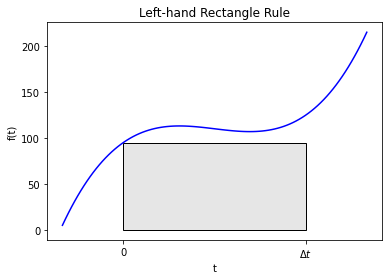

In [4]:
#graphical example
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2
b = 8
verts = [(a,0),(a,f(a)), (b,f(a)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Left-hand Rectangle Rule")
plt.show()

This figure demonstrates why the name left-hand rectangle rule is used: the area under the curve is estimated as a rectangle that touches the curve at the left endpoint of the integral bounds.

Putting this together gives us

$$y(\Delta t) = y(0) + \Delta t f(y(0), 0).$$

This will give an approximate value of the solution $\Delta t$ after the initial condition. If we wanted to continue out to later time we could apply the rule again repeatedly.  To do this we'll define the value of $y$ after $n$ timesteps, each of width $\Delta t$ as

$$y^{n} = y(t^n) = y(n\Delta t), \qquad \text{for } n=0,\dots, N.$$

Using this we can write the solution using the left-hand rectangle rule for integration as

$$y^{n+1} = y^n + \Delta t f(y^n, t^n).$$

This method is called the **explicit Euler method** or the **forward Euler method**. The method is said to be explicit because the update is defined by the value of the solution at time $t^n$.

Let's say we want to numerically approximate

$$ y'(t) = f(y,t), \qquad y(0) = y_0,$$

from time $t=0$ to $t=a$. But we want want to know more than just $y(t=a)$. We want to compute $y(t)$ at $N=10$ intermediate points along the way. In other words, we want to compute $y(t=0.1a$), $y(t=0.2a)$, etc.

How can we do this with the **explicit Euler method**? We could set $\Delta t = 0.1a$ and apply the formula

$$y^{n+1} = y^n + \Delta t f(y^n, t^n).$$

$N$ times for $n=1$ to $n=N$.

## Generalization and Python Implementation

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Write psuedocode for a Python function with four inputs: a function to evaluate the right-hand side of the differential equation, i.e., $f(y,t)$, the initial condition $y_0$, the time step $\Delta t$, and the number of timesteps $N$. Your function should use the forward Euler method to estimate $y(t=\Delta t)$, $y(t=2 \Delta t)$, ..., $y(t=N \Delta t)$. Your function should return two numpy arrays: one for time $t$ and one for $y$. <b>This is excellent practice for the next exam.</b> Converting a list of instructions into pseudocode is a key skill we teach (and assess) in this class.
</div>

We now define a Python function that for a given right-hand side, initial condition, and time step and number of time steps, $N$, performs the forward Euler method. This function will take the name of the function on the right-hand side as an input.

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Trade pseudocode with a partner. Compare your partner's pseudocode to the Python code below. Offer your partner one piece of constructive feedback.
</div>

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Complete the function <tt>forward_euler</tt> by filling in the missing line. Hint: The equation $y^{n+1}=$ ... in the reading is important.
</div>

In [5]:
def forward_euler(f,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    
    # convert to integer
    numsteps = int(numsteps)
    
    # initialize vectors to store solutions
    y = np.zeros(numsteps+1)
    
    # compute time
    t = np.arange(numsteps+1)*Delta_t
    
    # copy initial condition
    y[0] = y0
    
    # loop over timesteps
    for n in range(1,numsteps+1):
        
        # Compute y[n]. Hint: You only need to write a single line of Python code.
        # Add your solution here
    return t, y

## Test Problem

We created a function. Now let's test this on a simple problem:

$$y'(t) = -y(t), \qquad y_0 = 1.$$

The solution to this problem is 

$$y(t) = e^{-t}.$$

Let's compare the exact solution to the forward Euler solution with a time step of 0.1.

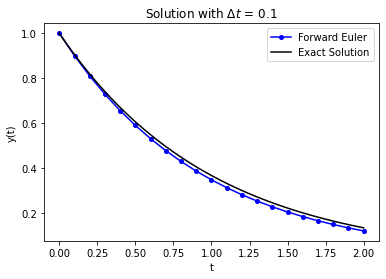

In [6]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 2.0
t,y = forward_euler(RHS,1,Delta_t,t_final/Delta_t)
plt.plot(t,y,'-',label="Forward Euler",color="blue",marker="o",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

That looks pretty close. The numerical solution appears to be slightly below the exact solution, but the difference appears to be small.

Your function <tt>forward_euler</tt> works if it computes the following values for the test problem:

| t 	| y |
| - 	| - |
| 0.0 	| 1.00000 |
| 0.1 	| 0.90000 |
| 0.2 	| 0.81000 |
| 0.3 	| 0.72900 |
| 0.4 	| 0.65610 |
| 0.5 	| 0.59049 |
| 0.6 	| 0.53144 |
| 0.7 	| 0.47830 |
| 0.8 	| 0.43047 |
| 0.9 	| 0.38742 |
| 1.0 	| 0.34868 |
| 1.1 	| 0.31381 |
| 1.2 	| 0.28243 |
| 1.3 	| 0.25419 |
| 1.4 	| 0.22877 |
| 1.5 	| 0.20589 |
| 1.6 	| 0.18530 |
| 1.7 	| 0.16677 |
| 1.8 	| 0.15009 |
| 1.9 	| 0.13509 |
| 2.0 	| 0.12158 |

In [7]:
# Print the values for t and y in a nice table
print("| t \t| y |")
print("| - \t| - |")
for i in range(len(t)):
    print("| {0:.1f} \t| {1:0.5f} |".format(t[i],y[i]))

| t 	| y |
| - 	| - |
| 0.0 	| 1.00000 |
| 0.1 	| 0.90000 |
| 0.2 	| 0.81000 |
| 0.3 	| 0.72900 |
| 0.4 	| 0.65610 |
| 0.5 	| 0.59049 |
| 0.6 	| 0.53144 |
| 0.7 	| 0.47830 |
| 0.8 	| 0.43047 |
| 0.9 	| 0.38742 |
| 1.0 	| 0.34868 |
| 1.1 	| 0.31381 |
| 1.2 	| 0.28243 |
| 1.3 	| 0.25419 |
| 1.4 	| 0.22877 |
| 1.5 	| 0.20589 |
| 1.6 	| 0.18530 |
| 1.7 	| 0.16677 |
| 1.8 	| 0.15009 |
| 1.9 	| 0.13509 |
| 2.0 	| 0.12158 |


In [9]:
# Removed autograder test. You may delete this cell.

## Impact of Step Size on Integration Error

We could re-do this with different size time steps and compare the solutions as a function of $\Delta t$.

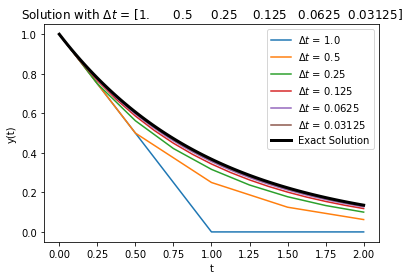

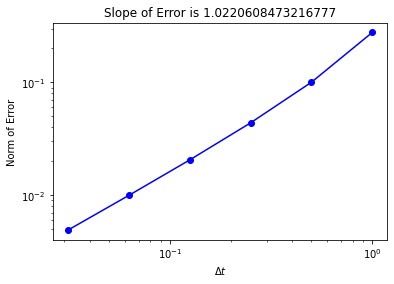

In [10]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = forward_euler(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="blue")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

Notice that the error indicates that this is a first-order method in $\Delta t$: when I decrease $\Delta t$ by a factor of 2, the error decreases by a factor of 2.  In this case we measured the error with a slightly different error norm:

$$\mathrm{Error} = \frac{1}{\sqrt{N}}\sqrt{\sum_{n=1}^{N} \left(y^n_\mathrm{approx} - y^n_\mathrm{exact}\right)^2},$$

where $N$ is the number of steps the ODE is solved over.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 For this test problem, why does the numeric solution always appear to underestimate the exact solution? Why is the approximation worse with larger $\Delta t$. Write 2 or 3 sentences below.
</div>

**Home Activity Answer**:

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Discuss your answer with a partner.
</div>

## Backward (Implicit) Euler

## Main Idea

We could use a different method to integrate our original ODE rather than the left-hand rectangle rule.  An obvious alternative is the right-hand rectangle rule:

$$y^{n+1} = y^n + \Delta t f(y^{n+1}, t^{n+1}).$$

This method is called the backward Euler method or the implicit Euler method.  Graphically, this method looks like:

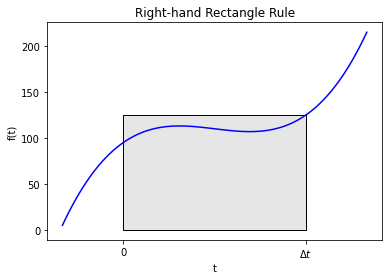

In [11]:
#graphical example
f = lambda x: (x-3)*(x-5)*(x-7)+110
x = np.linspace(0,10,100)
plt.plot(x,f(x),label="f(x)",color="blue")
ax = plt.gca()
a = 2
b = 8
verts = [(a,0),(a,f(b)), (b,f(b)),(b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='k')
ax.add_patch(poly)
ax.set_xticks((a,b))
ax.set_xticklabels(('0','$\Delta t$'))
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Right-hand Rectangle Rule")
plt.show()

It is implicit because the update is implicitly defined by evaluating $f$ with the value of $y$ we're trying to solve for. That means the update needs to solve the equation

$$ y^{n+1} - y^{n} - \Delta t f(y^{n+1},t^{n+1}) = 0,$$

using a nonlinear solver (unless $f$ is linear in $y$).  Therefore, this method is a bit harder to implement, but still fairly simple.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Spend 5 minutes reviewing your notes from the Chapter 4 Newton Methods notebooks.
</div>

The main algorithm to apply forward and backward Euler to a problem is [essentially the same](../06/Newton-Raphson-Method-in-One-Dimension.ipynb). With forward Euler, we could explicitly compute the next step $y^{n+1}$ with a simple formula. For backward Euler, we need to solve a system of equations.

## Python Implementation

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Complete the function below. In the commented out spot, you'll need to solve a nonlinear equation to calculate $y^{n+1}$. Hints: You want to write two lines of code. The <b>first line</b> will use a lambda function to define the nonlinear equation to be solved. The <b>second line</b> will call <tt>inexact_newton</tt> to solve the system and store the answer in <tt>y[n]</tt>. <b>Read these instructions again carefully.</b>
</div>

In [12]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    while (np.fabs(f(x)) > epsilon):
        fx = f(x)
        fxdelta = f(x+delta)
        slope = (fxdelta - fx)/delta
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        iterations += 1
    if LOUD:
        print("It took",iterations,"iterations")
    return x #return estimate of root

def backward_euler(f,y0,Delta_t,numsteps,LOUD=False):
    """Perform numsteps of the backward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    y = np.zeros(numsteps+1)
    t = np.arange(numsteps+1)*Delta_t
    y[0] = y0
    for n in range(1,numsteps+1):
        if LOUD:
            print("\nt =",t[n])
            
        # Add your solution here
        if LOUD:
            print("y =",y[n])
    return t, y

Now let's test our code using the simple problem from above.


t = 0.1
x0 = 1.0
x_ 1 = 1.0 - 0.1 / 1.1000000006700095 = 0.9090909091462818
It took 1 iterations
y = 0.9090909091462818

t = 0.2
x0 = 0.9090909091462818
x_ 1 = 0.9090909091462818 - 0.09090909091462818 / 1.0999999994210086 = 0.8264462809985739
It took 1 iterations
y = 0.8264462809985739

t = 0.30000000000000004
x0 = 0.8264462809985739
x_ 1 = 0.8264462809985739 - 0.0826446280998574 / 1.0999999994210086 = 0.7513148008682485
It took 1 iterations
y = 0.7513148008682485

t = 0.4
x0 = 0.7513148008682485
x_ 1 = 0.7513148008682485 - 0.07513148008682485 / 1.0999999994210086 = 0.6830134552988206
It took 1 iterations
y = 0.6830134552988206


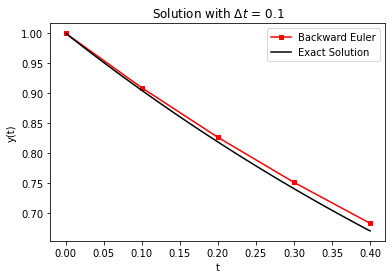

In [13]:
RHS = lambda y,t: -y
Delta_t = 0.1
t_final = 0.4
t,y = backward_euler(RHS,1,Delta_t,t_final/Delta_t,True)
plt.plot(t,y,'-',label="Backward Euler",color="red",marker="s",markersize=4)
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.exp(-t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()

<div class="admonition danger"> 
<b>Important</b>: Test your function with both <tt>LOUD=True</tt> and <tt>LOUD=False</tt> options. You should get the same answer.
</div>

Your function in the last home activity works if it computes the following values:

| t | y |
| - | - |
| 0.0 | 1.0 |
| 0.1 | 0.9090909091462818 |
| 0.2 | 0.8264462809985739 |
| 0.3 | 0.7513148008682485 |
| 0.4 | 0.6830134552988206 |

In [14]:
# Removed autograder test. You may delete this cell.

## Impact of Step Size on Integration Error

Perhaps you've detected a pattern. After we implement and test a numerical method, we often want to know how the error rate changes with step size. As a first look, let's conduct a computational experiment with the same test problem.

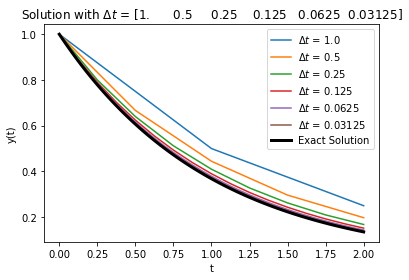

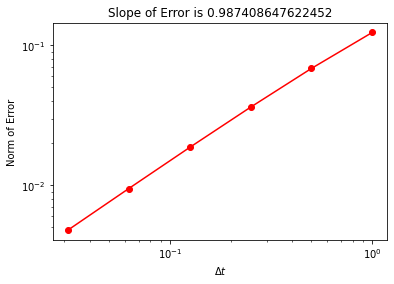

In [15]:
RHS = lambda y,t: -y
Delta_t = np.array([1.0,.5,.25,.125,.0625,.0625/2])
t_final = 2
error = np.zeros(Delta_t.size)
t_fine = np.linspace(0,t_final,100)
count = 0
for d in Delta_t:
    t,y = backward_euler(RHS,1,d,t_final/d)
    plt.plot(t,y,label="$\Delta t$ = " + str(d))
    error[count] = np.linalg.norm((y-np.exp(-t)))/np.sqrt(t_final/d)
    count += 1
plt.plot(t_fine,np.exp(-t_fine),linewidth=3,color="black",label="Exact Solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.show()
plt.loglog(Delta_t,error,'o-',color="red")
slope = (np.log(error[-1]) - np.log(error[-2]))/(np.log(Delta_t[-1])- np.log(Delta_t[-2]))
plt.title("Slope of Error is " + str(slope))
plt.xlabel("$\Delta t$")
plt.ylabel("Norm of Error")
plt.show()

A couple of things to notice from the plots: the backward Euler method approaches the solution from above, and the convergence of the error is at the same rate as forward Euler.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 <i> Exam Practice Question: </i> Above are two plots exploring how the step size impacts the error of the backwards Euler method for the test problem $\dot{y} = e^{-t},~y(0)=1.0$. Write a sentence to answer each of the following questions. 
</div>

**Home Activity Questions and Answers**
1. Why does this method always overapproximate the exact solution? Answer:
2. How does the error for this method scale with the step size $\Delta t$? Answer:

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Share your answer with a partner.
</div>